#1. Выберите ряд из первого задания.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import numpy as np
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
series = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']

In [ ]:
def grafs(series):
    """Функция для отображения графиков Time series, ACF, PACF """
    fig = plt.figure(figsize=(12, 8), dpi = 120)
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series, color='blue')
    ax1.set_title('Time series')
    ax1.set_facecolor('lightgray')
    ax1.grid(True)

    ax2 = fig.add_subplot(gs[1, 0])
    plot_acf(series, color='green',ax=ax2)
    ax2.set_title('Autocorrelation Function (ACF)')
    ax2.set_facecolor('lightyellow')
    ax2.grid(True)

    ax3 = fig.add_subplot(gs[1, 1])
    plot_pacf(series, color='red', ax=ax3)
    ax3.set_title('Partial Autocorrelation Function (PACF)')
    ax3.set_facecolor('lightblue')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

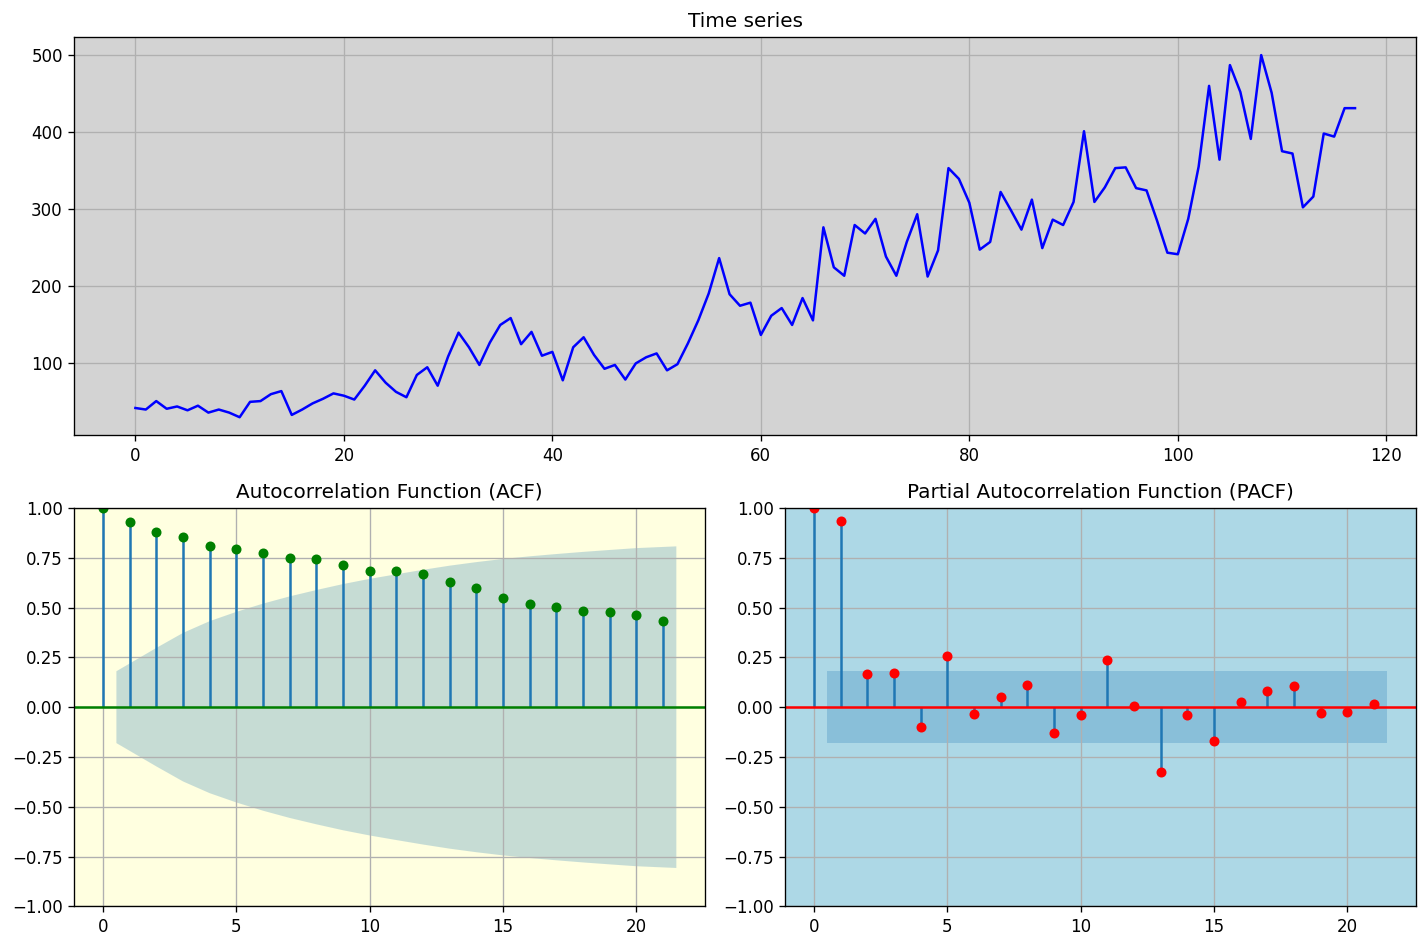

In [ ]:
grafs(series)

#2. Постройте его модель ARIMA.

ARIMA (авторегрессионная интегрированная скользящая средняя) - это статистическая модель, используемая для прогнозирования временных рядов. Она сочетает в себе три основные компоненты: авторегрессию (AR), интегрирование (I) и скользящую среднюю (MA).

Авторегрессия (AR): Эта компонента модели учитывает зависимость между текущим значением временного ряда и его предыдущими значениями. Она предполагает, что текущее значение ряда можно предсказать, используя линейную комбинацию предыдущих значений. Параметр авторегрессии (p) указывает на количество предыдущих значений, используемых в модели.

Интегрирование (I): Эта компонента модели отвечает за приведение временного ряда к стационарному виду. Стационарный ряд характеризуется постоянным средним и дисперсией, что упрощает его моделирование и прогнозирование. Параметр интегрирования (d) указывает на количество раз, которое нужно применить разности между последовательными значениями ряда, чтобы достичь стационарности.

Скользящая средняя (MA): Эта компонента модели учитывает зависимость между текущим значением временного ряда и ошибками прогнозов предыдущих значений. Она предполагает, что текущее значение ряда зависит от случайной ошибки предыдущих прогнозов. Параметр скользящей средней (q) указывает на количество предыдущих ошибок, используемых в модели.





**$\delta^p y_t = c + \sum_{i=1}^p a_i \delta^d y_{t-i} + \sum_{j=1}^q b_j \epsilon_{t-j} + \epsilon_t$**




Сочетание этих трех компонентов позволяет моделировать широкий спектр временных рядов. Параметры модели ARIMA (p, d, q) задаются пользователем и подбираются на основе анализа данных и оценки модели. Модель ARIMA может использоваться для прогнозирования будущих значений ряда на основе его прошлых значений и получения оценок точности прогнозов.

Модель ARIMA требует, чтобы временной ряд был стационарным, то есть имел постоянное среднее и дисперсию.

**Преобразуем временной ряд из нестационарного в стационарный**

In [ ]:
def Dickey_Fuller(y):
  """"Функция принимает на вход временной ряд
  и выводит на печать значения теста Дики-Фуллера 
  """
  result = adfuller(y)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    print()
  if result[1] > 0.05:
    print('Временной ряд не является стационарным')
  else:
    print('Стационарный временной ряд') 

In [ ]:
Dickey_Fuller(series)

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494

	5%: -2.889

	10%: -2.582

Временной ряд не является стационарным


In [ ]:
stat_series = pd.Series(boxcox(series,0))# Преобразование Бокса-Кокса

In [ ]:
stat_series = stat_series.diff().dropna() # Дифференцирование

In [ ]:
Dickey_Fuller(stat_series)

ADF Statistic: -7.601792
p-value: 0.000000
Critical Values:
	1%: -3.490

	5%: -2.887

	10%: -2.581

Стационарный временной ряд


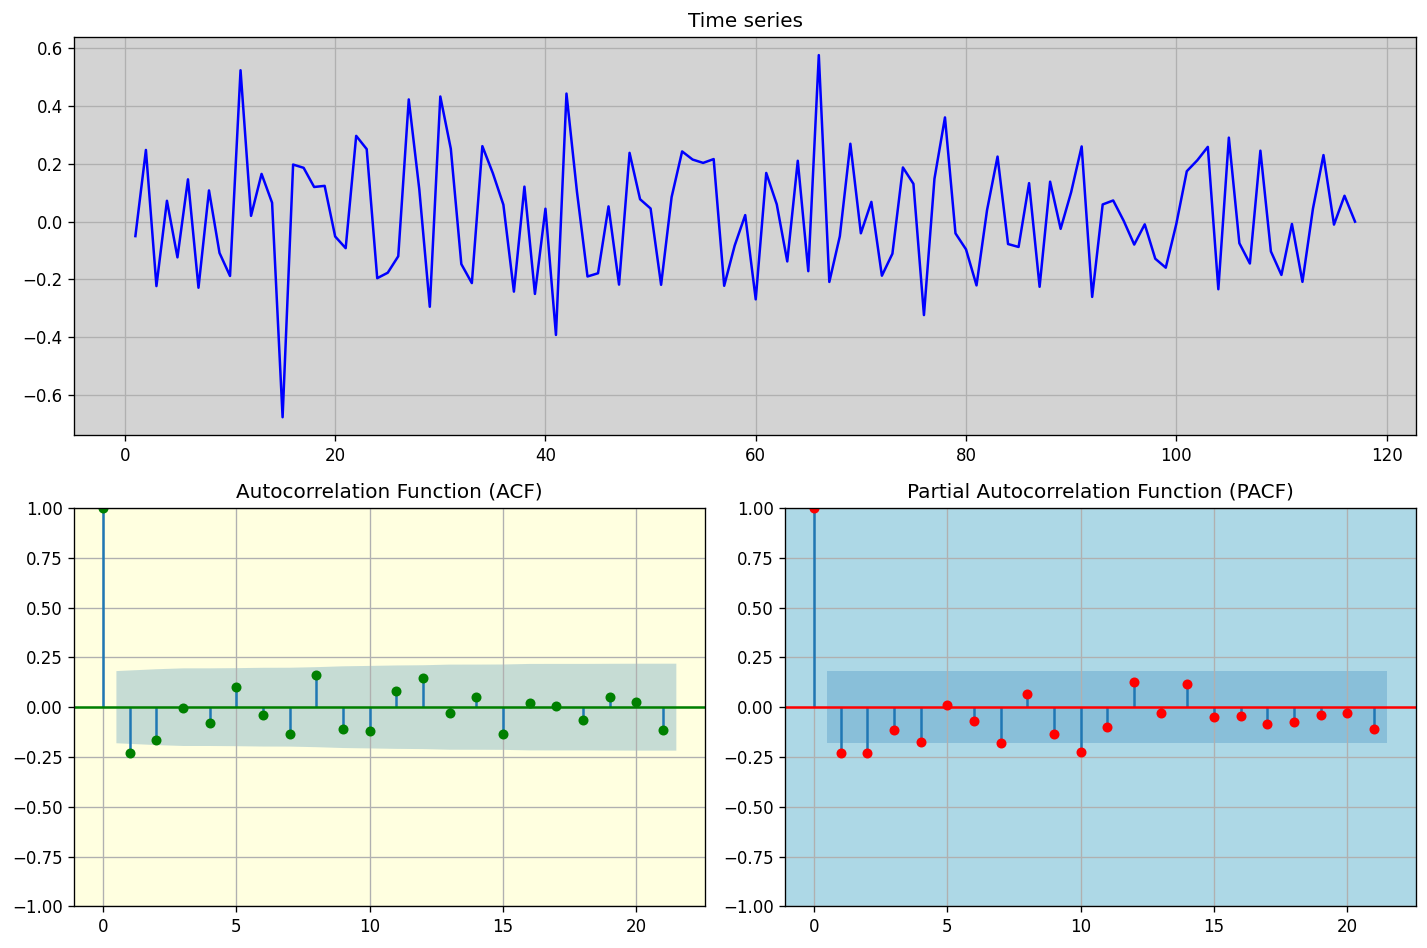

In [ ]:
grafs(stat_series)

In [ ]:
def train_test_split(series, train_size = 0.8):
    """Функция делит временной ряд на тренировочные
    и тестовые данные, по умолчанию тренировочные данные 80%, 
    тестовые данные 20%"""
    train_size = int(len(series) * train_size)
    train, test = series[:train_size], series[train_size:]
    return train, test

In [ ]:
train, test = train_test_split(stat_series)

In [ ]:
arima_mdl = ARIMA(train, order=(1,1,1))

In [ ]:
fit_arima = arima_mdl.fit()

In [ ]:
print(fit_arima.summary()) 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.635
Date:                Wed, 31 May 2023   AIC                            -13.270
Time:                        20:37:03   BIC                             -5.705
Sample:                             0   HQIC                           -10.217
                                 - 93                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2338      0.126     -1.853      0.064      -0.481       0.013
ma.L1         -1.0000    137.893     -0.007      0.994    -271.265     269.265
sigma2         0.0450      6.200      0.007      0.9

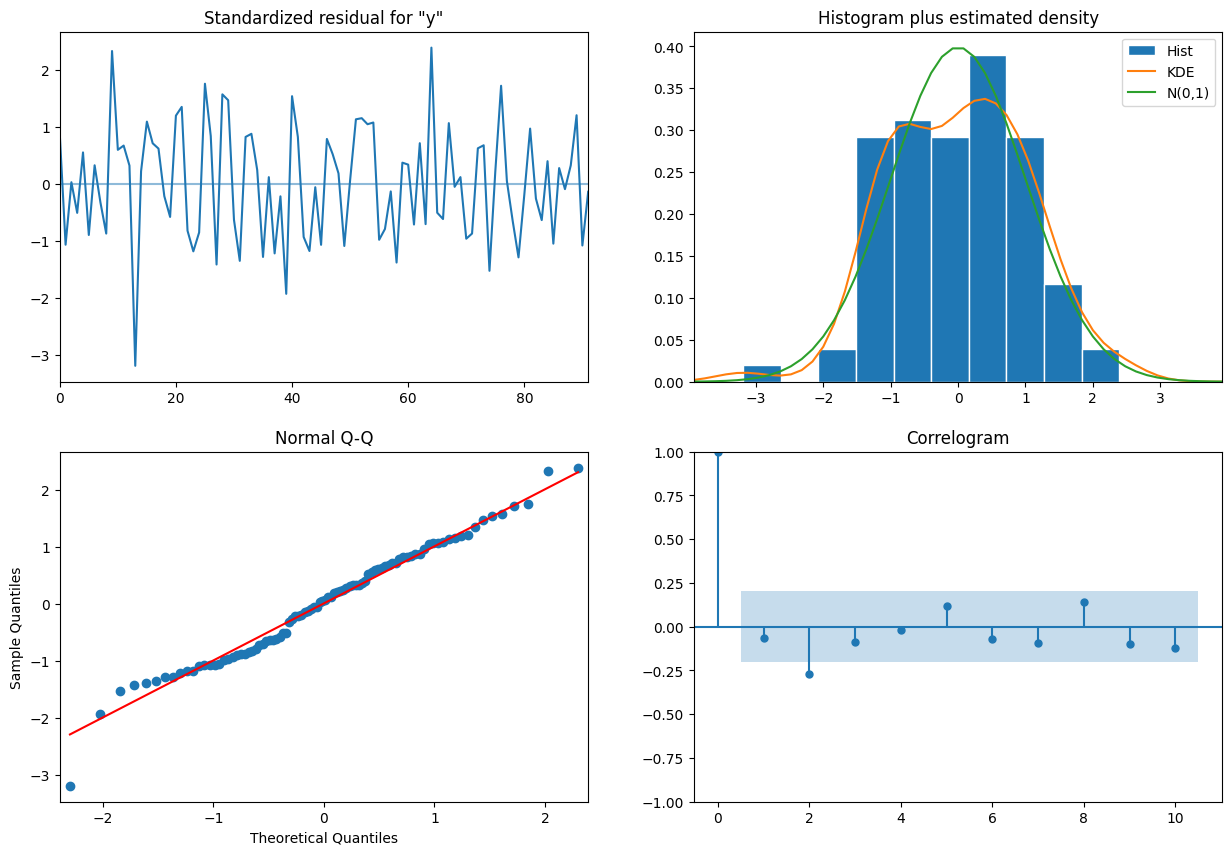

In [ ]:
fit_arima.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
Dickey_Fuller(fit_arima.resid)

ADF Statistic: -9.092433
p-value: 0.000000
Critical Values:
	1%: -3.504

	5%: -2.894

	10%: -2.584

Стационарный временной ряд


Хотя тест Дики-Фуллера показывает что остатки являются стационарными, на визуализации мы видим что есть есть небольшие разброс дисперсии и неравномерность распределения. Подберем оптимальные значения p, d и q. 


**Подбор гиперпараметров**

Информационный критерий Акаике (AIC — Akaike Information Criterion). AIC оценивает, насколько хорошо модель подходит под данные. Чем меньше AIC – тем точнее модель. Мы можем получить AIC модели, использовав result.aic.


In [ ]:
import itertools
from tqdm import tqdm

In [ ]:
def get_best_params(series):
  """Функция проходит по различным значениям p, d и q и подберает те, 
  при которых AIC будет минимальным."""
  p = range(0,10)
  d = range(0,10)
  q = range(0,10)
  pdq = list(itertools.product(p, d, q))
  best_pdq = (0,0,0)
  best_aic = np.inf
  for params in tqdm(pdq):
    try:
      model_test = ARIMA(series, order = params)
      result_test = model_test.fit()
      if result_test.aic < best_aic:
        best_pdq = params
        best_aic = result_test.aic
    except: 
      pass    
  return best_pdq

In [ ]:
best_params = get_best_params(train)

100%|██████████| 1000/1000 [18:15<00:00,  1.10s/it]


In [ ]:
print(best_params)

(1, 0, 1)


In [ ]:
arima2_mdl = ARIMA(train, order=(1,0,1))

In [ ]:
fit2_arima = arima2_mdl.fit()

In [ ]:
print(fit2_arima.summary()) 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   93
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  19.993
Date:                Wed, 31 May 2023   AIC                            -31.986
Time:                        21:22:52   BIC                            -21.856
Sample:                             0   HQIC                           -27.896
                                 - 93                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0248      0.002     10.339      0.000       0.020       0.029
ar.L1          0.5614      0.104      5.375      0.000       0.357       0.766
ma.L1         -0.9998     12.426     -0.080      0.9

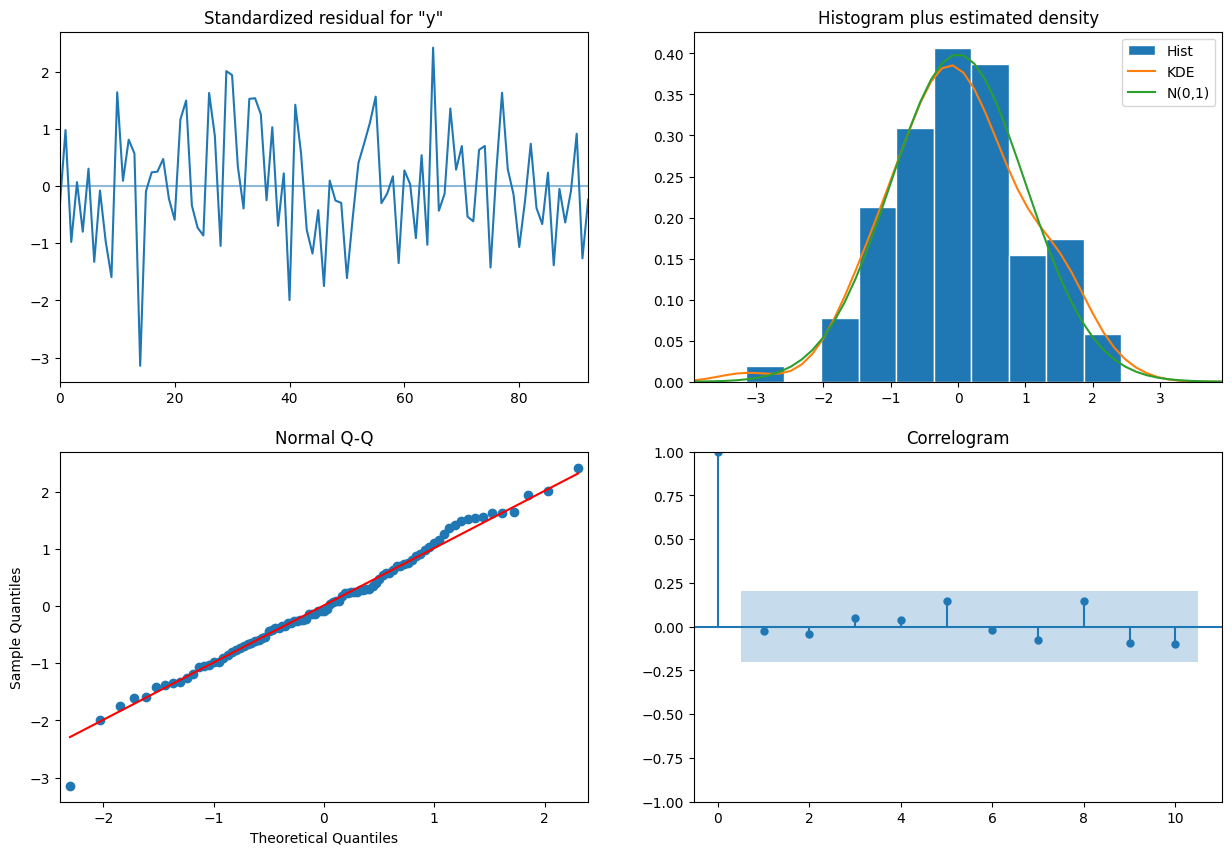

In [ ]:
fit2_arima.plot_diagnostics(figsize=(15, 10))
plt.show()

Сделаем прогноз с помощью модели c оптимизированными параметрами

In [ ]:
pred = fit2_arima.forecast(steps= len(test))

In [ ]:
mean_squared_error(test, pred)

0.0243853355305421

In [ ]:
pred_series = train.append(pd.Series(pred), ignore_index=True)

In [ ]:
def plot_pred_test(series,series_pred):
    """Функция для отображения предсказанных значений в сравнении с реальными """
    plt.figure(figsize=(12, 6), dpi = 120)
    plt.xticks(range(0, 120, 5))
    plt.yticks(np.arange(-0.8, 0.8, 0.1))
    plt.plot(series_pred, color='green', linewidth='3', label='Pred')
    plt.plot(series, color='blue', linewidth='3', label='Real', alpha = 0.5)
    plt.axvline(x= 93, color='red', linestyle='--', label='Разделение на реальные и предсказанные значения')
    plt.grid()
    plt.legend()
    plt.show()

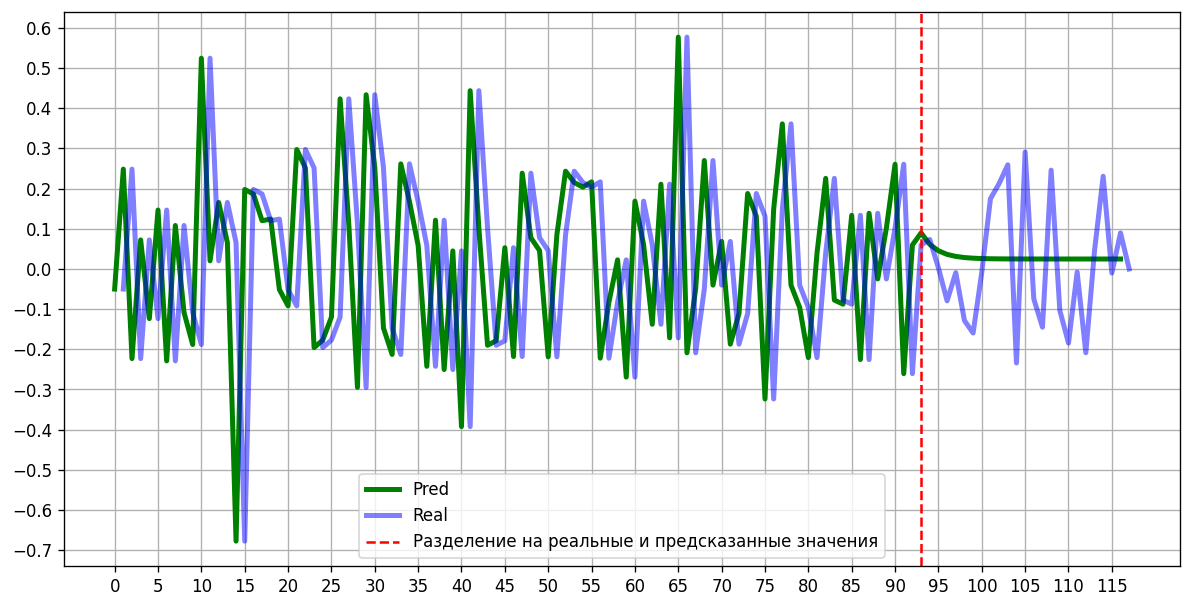

In [ ]:
plot_pred_test(stat_series,pred_series)